# Simple Linear Regression

## Overview

This notebook provides an in-depth exploration of simple linear regression.

**Simple Linear Regression**: A foundational method in machine learning utilized for predecting numerical values based on a single input variable.

The content herein covers the theoretical underpinning of simple linear regression, its practical implementation in `Python` leveraging prominent libraries such as `NumPy` and `SciKit-Learn`, and methodologies for assessing model performance.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Read Dataset

The dataset stored in a comma-seperated values (CSV) file is loaded using `pandas.read_csv()`. Pandas, a library offering a powerful suite of tools for data manipulation and analysis, is leveraged here. DataFrames, its core data structure, provide a tabular format for efficient data handling, making exploration, analysis, and visualization straightforwar.

**Note:**
- The path should be modified if it's located elsewhere.

In [2]:
dataset = pd.read_csv('dataset/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data = dataset.iloc[:, :7]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


## Exploratory Data Analysis (EDA)

This section delves into the loaded dataset using various techniques from `pandas` and `seaborn` libraries to gain a comprehensive understanding of its characteristics.

**1. Data Shape and Data Types:**
   - The `data.shape` attribute is use to retrieve the dimension (number of rows and columns) of the `DataFrame`. This provides a quick overview of the data's size.
   - The `data.dtypes` attribute returns a Series displaying the data type of each column. This helps identify potential data type mismatches or areas requiring type conversion.

In [4]:
data.shape

(398, 7)

In [5]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
dtype: object

<hr>

### Handling Missing Values in *horsepower* column

This section addresses the presence of missing values represented by the character `?` in the `horsepower` column of the dataset. Several steps are undertaken to ensure data quality and consistency.

**Identification of Non-Numeric Values:**
The `np.nonzero(~data.horsepower.str.isdigit())[0]` expression leverages `NumPy` to identify the indices of rows within the `horsepower` column that contain non-numeric values (using string comparison with `str.isdigit()` and negation with tilde sign `~`).

In [6]:
horsepower_nulls = np.nonzero(~data.horsepower.str.isdigit())[0]
horsepower_nulls

array([ 32, 126, 330, 336, 354, 374])

In [7]:
data.iloc[horsepower_nulls]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


The `data = data.replace('?', np.nan)` employs the replace method of the DataFrame to substitute all occurrences of the `?` character with the missing value representation `np.nan` (Not a Number).

In [8]:
data = data.replace('?', np.nan) # Replace '?' with NaN

**Verification of Missing Values (Optional):**
The Line `data.isnull().sum()` utilizes the `isnull().sum()` method to display the total number of missing values present in each column after the replacement step.


In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
dtype: int64

**Imputation with Median:**
The core imputation step is implemented in `data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())`. Here, the `fillna()` method is applied to the `horsepower` column to fill missing values (represented by `NaN`). The median value is calculated using `data['horsepower'].astype('float64').median()`. Converting the column to numeric data type `(float64)` ensures proper calculation of the median. This approach replaces missing values with the central tendency of the existing numerical data within the column.

In [10]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())

In [11]:
data.iloc[horsepower_nulls]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,93.5,2046,19.0,71
126,21.0,6,200.0,93.5,2875,17.0,74
330,40.9,4,85.0,93.5,1835,17.3,80
336,23.6,4,140.0,93.5,2905,14.3,80
354,34.5,4,100.0,93.5,2320,15.8,81
374,23.0,4,151.0,93.5,3035,20.5,82


**2. Data Skewness:**
   - The `data.skew()` method calculates the skewness for each numerical column in the DataFrame. Skewness is a measure if the asymmetry of a distribution relative to a normal distribution. A positive skew indicates a distribution with a longer tail on the right, while a negative skew indicates a longer tail on the left. Understanding skewness can be crucial for selecting appropriate statistical methods or data transformations.

In [12]:
data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
model year      0.011535
dtype: object

**3. Histogram Visualization:**
   - The `data.hist()` method generates histograms for all numerical columns in the DataFrame. Histograms provides a visual representation of the dirstribution of data points, allowing you to identify potential patterns or outliers.

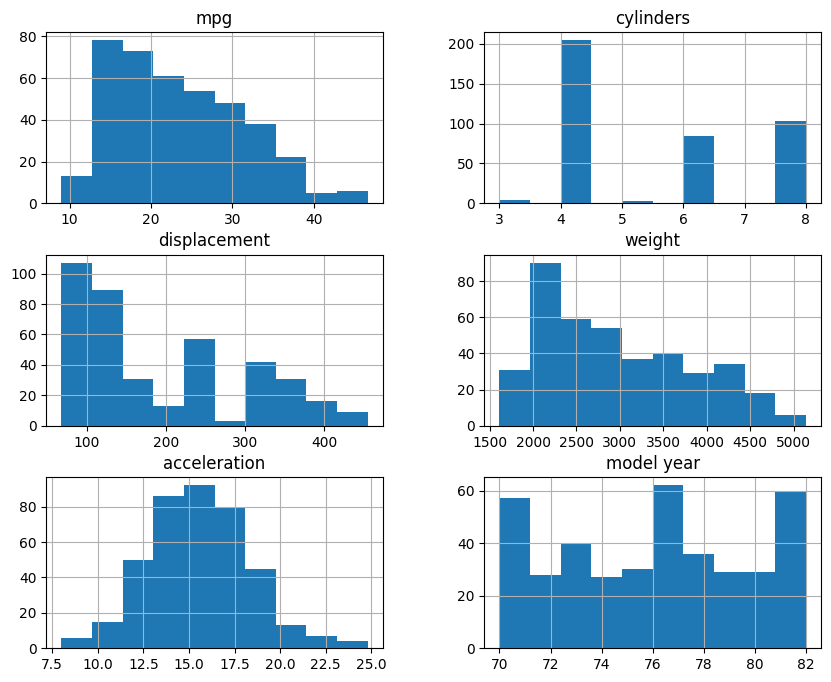

In [13]:
data.hist(figsize=(10, 8))
plt.show()

**4. Density Plot:**
   - The `data.plot(kind='density')` method utilizes the `pandas.plotting` module to create density plots for all numerical columns. Density plot are similar to histograms, but depict the probability density of the data, offering a smoother visualization of the distribution.

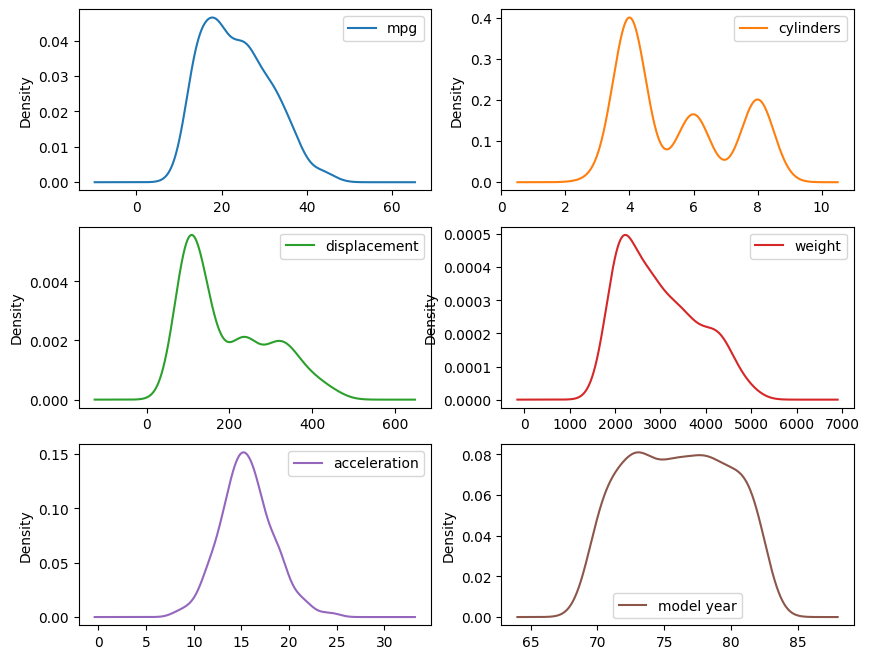

In [14]:
data.plot(kind='density', sharex=False, subplots=True,
         figsize=(10, 8), layout=(3, 2))
plt.show()

**5. Box Plot:**
   - The `data.plot(kind='box')` code leverages `pandas.plottong` to generate box plots for all numerical columns. Box plots display the distribution of data points using quartiles (25<sup>th</sup>, 50<sup>th</sup>, and 75<sup>th</sup> percentiles) and potential outliers.

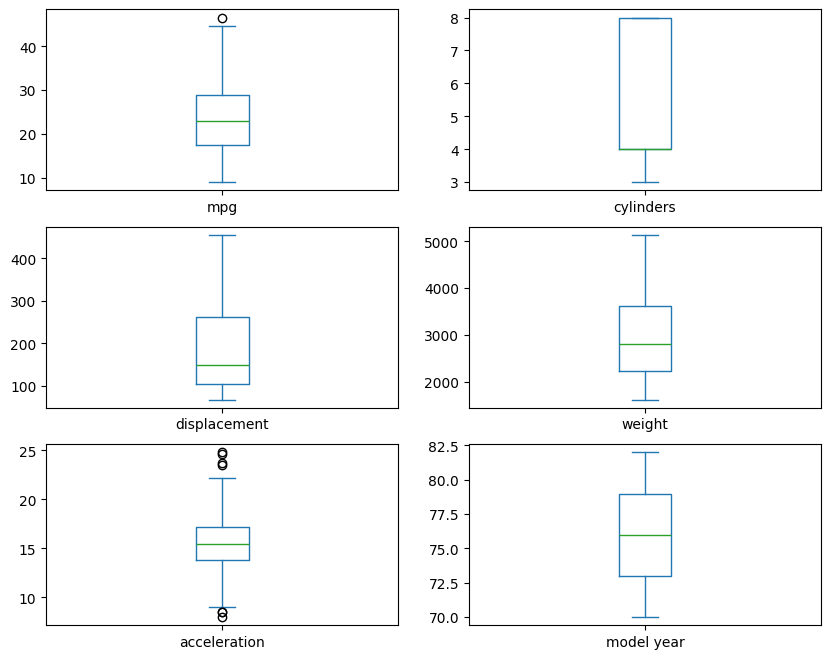

In [15]:
data.plot(kind='box', sharex=False, subplots=True,
         figsize=(10, 8), layout=(3, 2))
plt.show()

**6. Correlation Heatmap:**
   - The `sns.heatmap(data.corr(), annot=True)` code from the seaborn library creates a correlation heatmap to visualize the pairwise correlations between all numerical columns in the DataFrame. The correlation coefficient measure the strength and direction of the linear relationship between two variables. The heatmap provides a color-coded representation of these correlations, allowing you to identify potential relationships between features that might be relevant for you analysis.

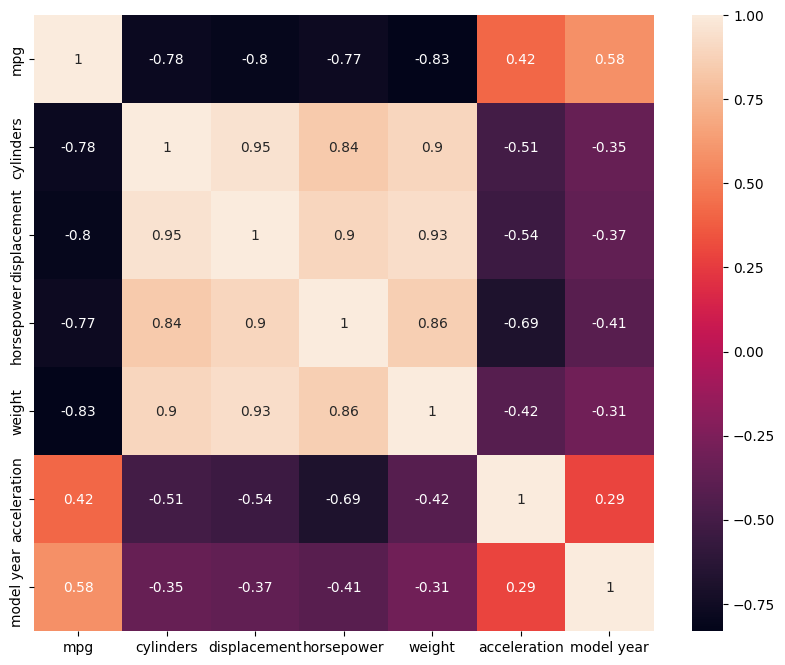

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**7. Scatter Matrix:**
   - The `pd.plotting.scatter_matrix(data)` code from `pandas.plotting` module generates a scatter matrix, displaying all pairwise scatter plots between numerical columns in the DataFrame. Scatter plots visually depict the relationship between two variable, helping to identify potential linear or non-linear relationship.

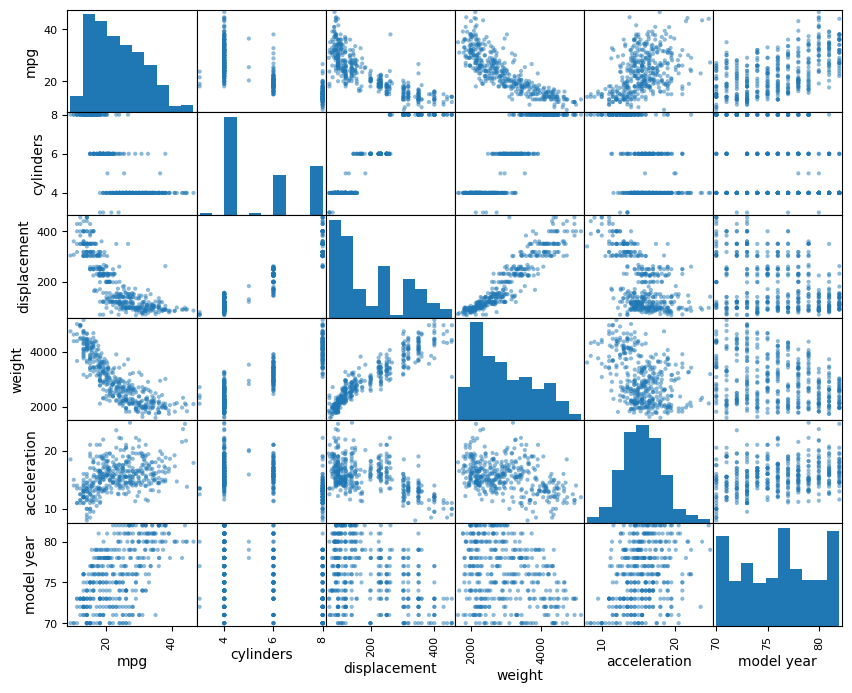

In [17]:
pd.plotting.scatter_matrix(data, figsize=(10, 8))
plt.show()

**8. Pairplot with KDE:**
   - The `sns.pairplot(data, diag_kind='kde')` code from seaborn craetes a pairplot, similar `scatter_matrix` of `pandas` but with the diagonal plots replaced by kernel density estimation (KDE) plots. KDE plots are a smooth representation of the distribution of each variable. This visualization provides a more comprehensive view of the relationships between features and the distribution of individual variables.

By emplying these diverse exploratory data analysis techniques, you can gain valuable insights into the characteristics of your dataset, identify potential issues, and guide ffor further analysis or modelling steps.

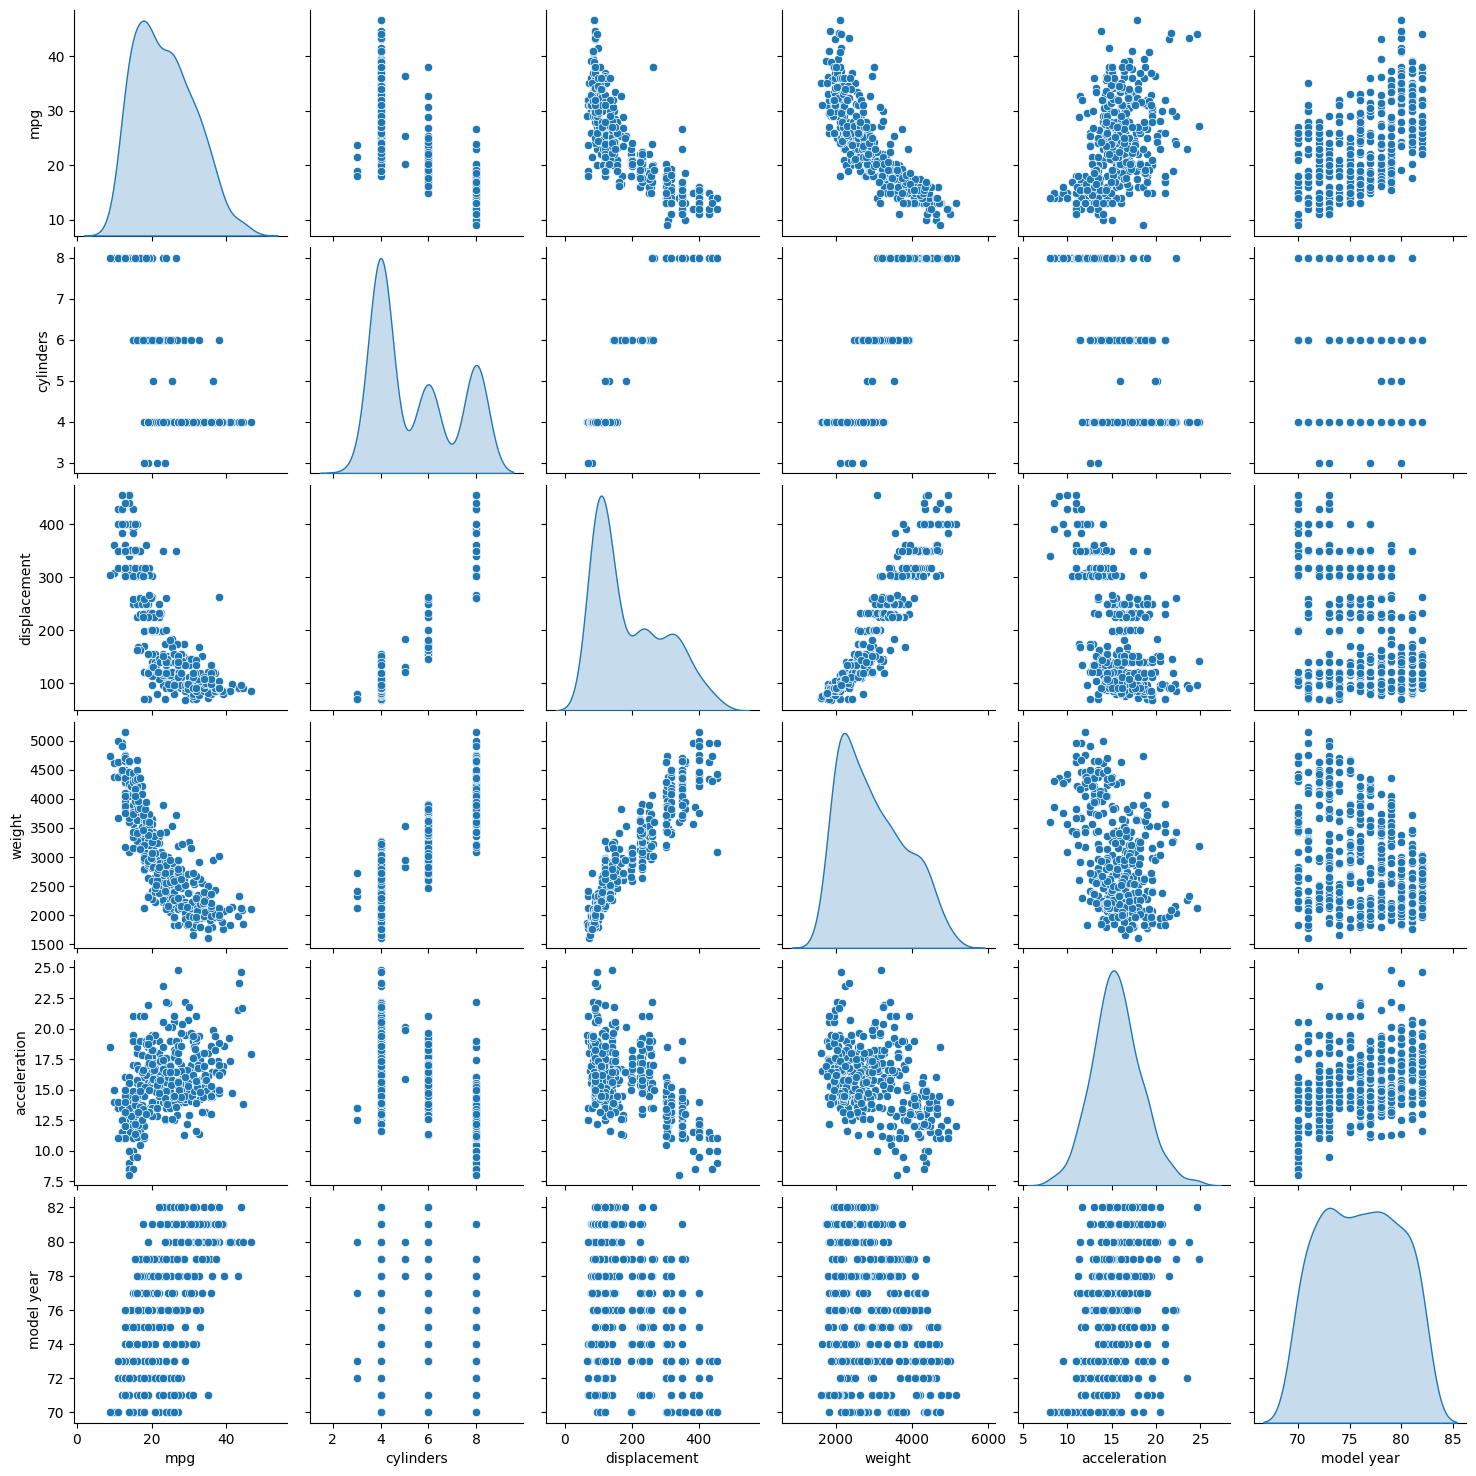

In [18]:
sns.pairplot(data, diag_kind='kde')
plt.show()

## Data Preparation for Regression

This section focuses on preparing the data for simple linear regression analysis. Here, the target variable and the feature variable are isolated, and the data is subsequently split into training and testing sets.

**1. Target and Feature Variable Selection**
- The target variable, representing the values to be predicted, is assigned to `y` by selecting the `mpg` (miles per gallon) column from the DataFrame `data`.
- The feature variable, considered to influence the target variable, is assigned to `x` by selecting the `weight` column from the DataFrame `data`.

In [19]:
y = np.asanyarray(data['mpg'])
x = np.asanyarray(data['weight']).reshape(-1, 1)

**2. Train / Test Split**
- The `train_test_split()` function from `scikit-learn` is employed to partition the data into training and testing sets. The split ensures a more robust evaluation of the model's performance, as the model is not directly exposed to the test data during training.
- The arguments are:
  - `x`: Feature variable (`weight`)
  - `y`: Target variable(`mpg`)
  - `test_size`: Allocates 20% of the data to the testing set and the remaining 80% to the training set.
  - `random_state`: Sets a seed for random number generatorm ensuring reproducibility  of the split if code is run multiple times.


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=6)

## Simple Linear Regression Model

This section details the creation, fitting, and evaluation of the simple linear regression model to predict `mpg` based on vehicle `weight`.

**1. Model Instantiation:**
- A linear regression model is instantiated using `model = LinearRegression()` from `scikit-learn`. This model represents the linear relationship between the feature variable (`weight`) and the target variable (`mpg`).

In [21]:
model = LinearRegression()

**2. Model Fitting:**
- The model is trained using the `model.fit(x_train, y_train)` method. Here, the training data (`x_train` for `weights` and `y_train` for `mpg`) is provided to the model, allowing it to learn the underlying relationship between the feature and target variables.

In [22]:
model.fit(x_train, y_train)

LinearRegression()

**3. Coefficient and Intercept Retrieval:**
- The coefficients (`model.coef_`) and intercept (`model.intercept_`) are retrieved from the fitted model:
    - Coefficients represent the slope of each feature variable in the linear equation. In this case (simple linear regression), there is only one coefficient to the `weight` feature, indicating its impact on `mpg`.
    - Intercept represents the `y-axis` intercept of the regression line.

In [23]:
model.coef_

array([-0.00756972])

In [24]:
model.intercept_

45.96759809038848

## Model Predictions on Test Set

This sectio leverages the trained model to generate predictions for the unseen testing data.

**Prediction Generation:**
- the `model.predict(x_test)` method is used to make predictions on the testing set (`x_test`). The model applies the learned relationship between `weight` and `mpg` to predict the `mpg` values for the weight data points in the testing set. These predicted `mpg` values are stored in the `y_predict` variable.

By performing predictions on the testing set, you can access the model's generalization ability and evaluate its performance on unseen data. The next step will likely focus on this evaluation using appropriate metrics.

In [25]:
y_pred = model.predict(x_test)
y_pred

array([18.47437032, 10.39747769, 22.60743815,  8.48990792, 19.8899082 ,
       21.25245803, 31.16879294, 26.58911155, 30.18472917, 32.0771595 ,
       31.83492842, 28.96600404, 30.9417013 , 21.97915128, 18.99668109,
       25.83213942, 30.3361236 , 28.90544627, 26.61939044, 17.31620296,
       24.35604377, 28.82974906, 20.00345402, 29.11739847,  8.14170074,
       27.79269724, 14.25046583, 31.01739852, 22.06241821, 10.14767688,
       25.5747689 , 13.89468893, 12.96361321, 30.4799483 , 23.78831467,
       26.24847409, 21.40385246, 19.24648189, 22.96321505, 13.58433035,
       30.9417013 , 23.37954972, 19.85962931, 15.97636229, 23.67476885,
       24.5074382 , 24.65883262, 30.97954991, 28.55723909, 12.22935024,
       31.96361368, 29.38990844, 21.15405166, 32.00146229, 18.17158146,
       20.71500782, 28.63293631, 28.55723909, 26.38472908, 25.74887249,
       30.68433078, 32.54648222, 25.75644221, 15.06799573, 17.5432946 ,
       28.82217934, 31.24449016, 17.73253763, 29.38990844, 28.02

## Model Evaluation - Predicted vs. Actual Values

This section delves into evaluating the model's performance by comparing the predicted `mpg` with the actual `mpg` values in the testing set.

**1. Comparison DataFrame Creation:**
    
- A `pandas` DataFrame named `frame` is constructed using `pd.DataFrame({'Weight': np.squeeze(x_test), 'Real MPG': y_test, 'Predicted MPG': y_pred})`. This DataFrame combines the actual `mpg` values from the testing set (`y_test`) in a column named `Real MPG`, and the predicted `mpg` values in a column named `Predicted MPG`.

In [26]:
frame = pd.DataFrame({'Weight': np.squeeze(x_test), 'Real MPG': y_test, 'Predicted MPG': y_pred})
frame

,Weight,Real MPG,Predicted MPG
0,3632,16.0,18.474370
1,4699,13.0,10.397478
2,3086,14.0,22.607438
3,4951,12.0,8.489908
4,3445,17.7,19.889908
...,...,...,...
75,3150,20.0,22.122976
76,3880,17.5,16.597079
77,4952,12.0,8.482338
78,4335,16.0,13.152856


**2. Visualization (Optional):**
- By examining the DataFrame on creating visualizations, you can gain valuable insights into the model's ability to accurately predict `mpg` values based on vehicle `weight`

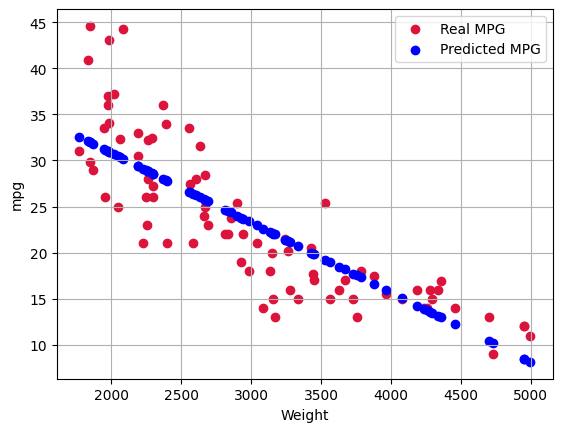

In [27]:
# visualization (Optional)
plt.scatter(x_test, y_test, color='crimson', label='Real MPG')
plt.scatter(x_test, y_pred, color='blue', label='Predicted MPG')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Note:**
- Additonal metrics like **mean squared error (MSE)** or **R<sup>2</sup>** can be employed for more quantitative evaluation of the model's performance.

In [28]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-Squared (R2):', r2)

Mean Squared Error (MSE): 21.98136303092862
R-Squared (R2): 0.6985451074893023


## Visualizing the Relationship Between Weight and MPG

This section delves into visualizing the relationship between vehicle `weight` and `mpg` using two common plotting libraries: `seaborn` and `matplotlib`.

**1. Seaborn**

`seaborn` offers a concise way to create a scatter plot with a fitted regression line:

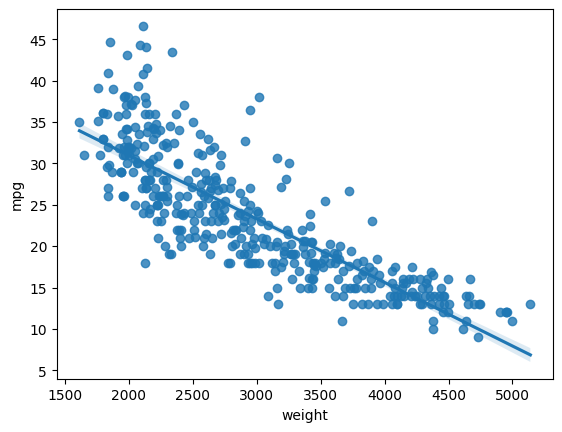

In [29]:
sns.regplot(x='weight', y='mpg', data=data)
plt.show()

**2. Matplotlib**
`matplotlib` provides more granular control over plot elements:

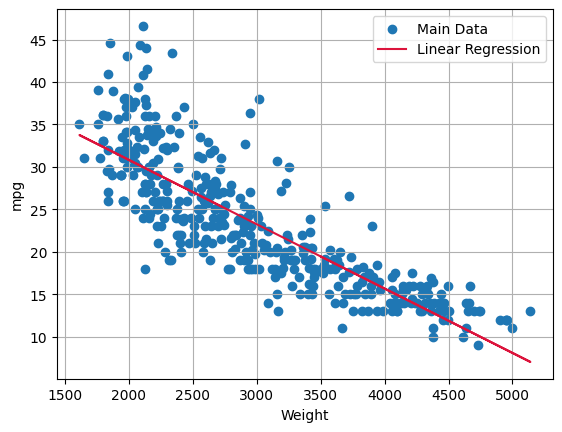

In [30]:
plt.scatter(data['weight'], data['mpg'], label='Main Data')
plt.plot(data['weight'], model.coef_[0] * data['weight'] + model.intercept_, color='crimson',
         label='Linear Regression')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.legend(loc='upper right')
plt.grid()
plt.show()